In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

%matplotlib inline

In [6]:
images = [cv2.imread(f) for f in sorted(glob.glob('test_images/*'))]

In [132]:
len(images)

6

In [14]:
# tuples: image id, lower left corner tuple, and side length
croplist = []

Show images.

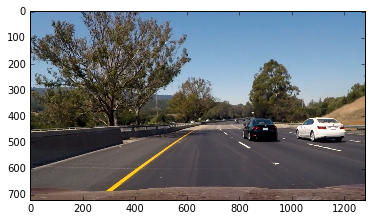

In [117]:
plt.imshow(images[5][:,:,::-1])

Test if a given set of parameters produces a good crop.

In [133]:
def show_crop(img, ll, side):
    """ crop according to lower-left corner and side length """
    plt.imshow(img[ll[0]-side:ll[0],ll[1]:ll[1]+side,::-1])

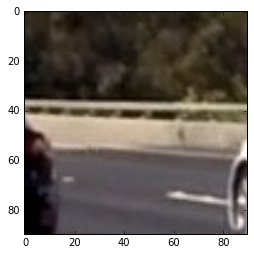

In [125]:
show_crop(images[5], (480,930), 90)

In [126]:
croplist.append((5, (480,930), 90))

In [127]:
len(croplist)

41

Check that I didn't make a mistake when entering numbers

In [131]:
sum((len(x)==3 and len(x[1])==2) for x in croplist)==len(croplist)

True

In [134]:
def crop_and_resize(img, ll, side):
    return cv2.resize(img[ll[0]-side:ll[0], ll[1]:ll[1]+side], (64,64))

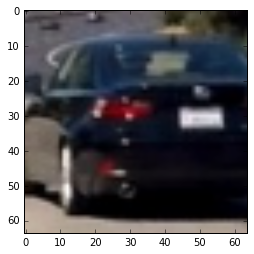

In [136]:
plt.imshow(crop_and_resize(images[croplist[0][0]], croplist[0][1], croplist[0][2])[:,:,::-1])

In [139]:
for i, (imgidx, ll, side) in enumerate(croplist):
    new_img = crop_and_resize(images[imgidx], ll, side)
    cv2.imwrite('cropped_test_images/{0}.jpg'.format(i), new_img)
    

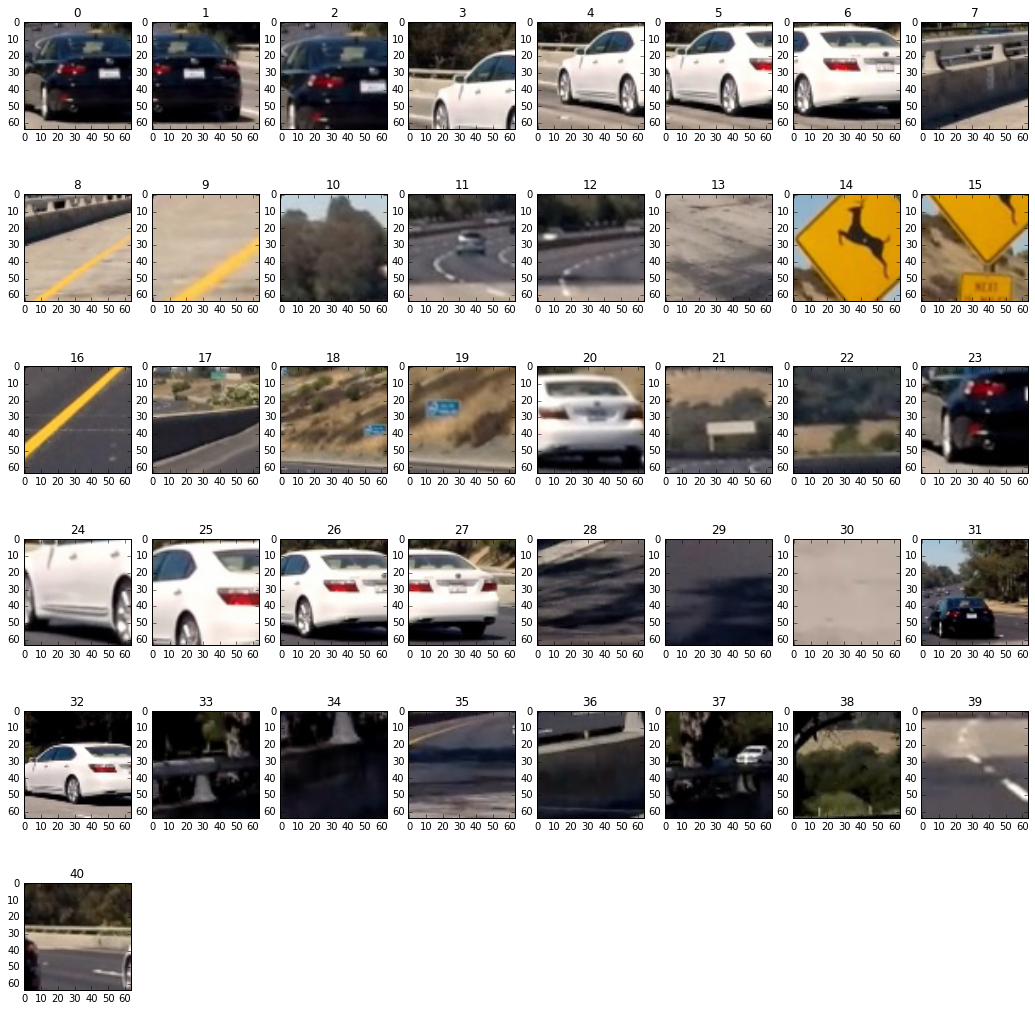

In [140]:
plt.figure(figsize=(18,18))
n_cols = 8
n_rows = np.ceil(len(croplist)/n_cols).astype(int)
for i in range(len(croplist)):
    plt.subplot(n_rows,n_cols,i+1)
    plt.imshow(cv2.imread('cropped_test_images/{0}.jpg'.format(i))[:,:,::-1])
    plt.title(str(i))

In [141]:
labels = [1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0]

In [142]:
len(labels)

41

In [143]:
import pickle
with open('cropped_test_images/labels.pickle','wb') as f:
    pickle.dump(np.array(labels), f)